# Análisis exploratorio

In [996]:
import pandas as pd
import numpy as np

In [997]:
from pathlib import Path
CSV = Path("../data/by_game/rascacielos.csv")
df = pd.read_csv(CSV)

In [998]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 87 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   date                          612 non-null    object 
 1   9:00 ciclos                   612 non-null    int64  
 2   9:00 asistencia               612 non-null    int64  
 3   10:00 ciclos                  612 non-null    int64  
 4   10:00 asistencia              612 non-null    int64  
 5   11:00 ciclos                  612 non-null    int64  
 6   11:00 asistencia              612 non-null    int64  
 7   12:00 ciclos                  612 non-null    int64  
 8   12:00 asistencia              612 non-null    int64  
 9   13:00 ciclos                  612 non-null    int64  
 10  13:00 asistencia              612 non-null    int64  
 11  14:00 ciclos                  612 non-null    int64  
 12  14:00 asistencia              612 non-null    int64  
 13  15:00

### Datos faltantes

In [999]:
na = df.isna().mean().sort_values(ascending=False)
display(na.head(20))

date                  0.0
Wq_12:00(min)         0.0
mu_14:00(/min)        0.0
lambda_14:00(/min)    0.0
state_13:00           0.0
Wq_13:00(min)         0.0
rho_13:00             0.0
mu_13:00(/min)        0.0
lambda_13:00(/min)    0.0
state_12:00           0.0
rho_12:00             0.0
Wq_14:00(min)         0.0
mu_12:00(/min)        0.0
lambda_12:00(/min)    0.0
state_11:00           0.0
Wq_11:00(min)         0.0
rho_11:00             0.0
mu_11:00(/min)        0.0
lambda_11:00(/min)    0.0
state_10:00           0.0
dtype: float64

## EDA visual

### Asistencia total por año

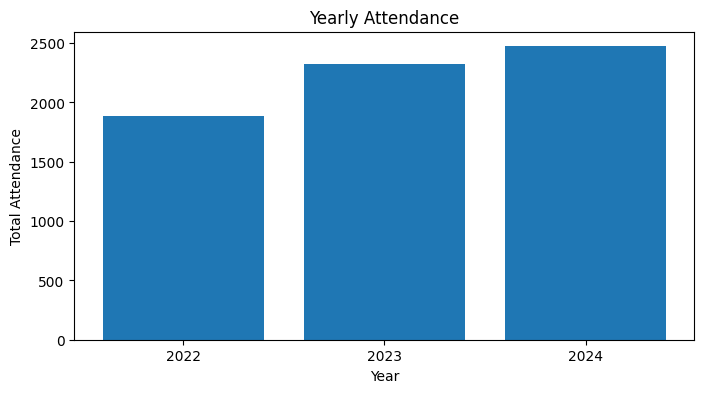

In [1000]:
plt.figure(figsize=(8,4))
plt.bar(df["year"].astype(str), df["asistencia total"])
plt.title("Yearly Attendance")
plt.xlabel("Year")
plt.ylabel("Total Attendance")
plt.show()


### Asistencia por día de la semana

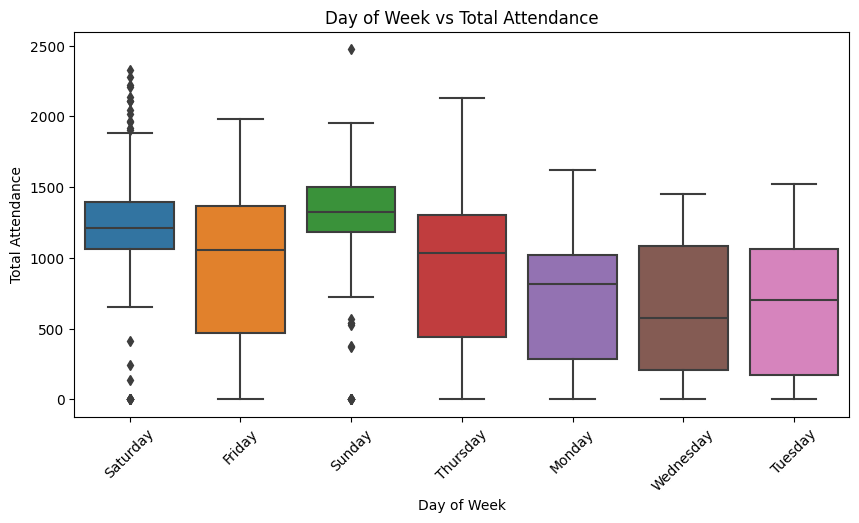

In [1001]:
if {"day_of_week","asistencia total"}.issubset(df.columns):
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x="day_of_week", y="asistencia total")
    plt.xlabel("Day of Week")
    plt.ylabel("Total Attendance")
    plt.title("Day of Week vs Total Attendance")
    plt.xticks(rotation=45)
    plt.show()

### Matriz de correlación

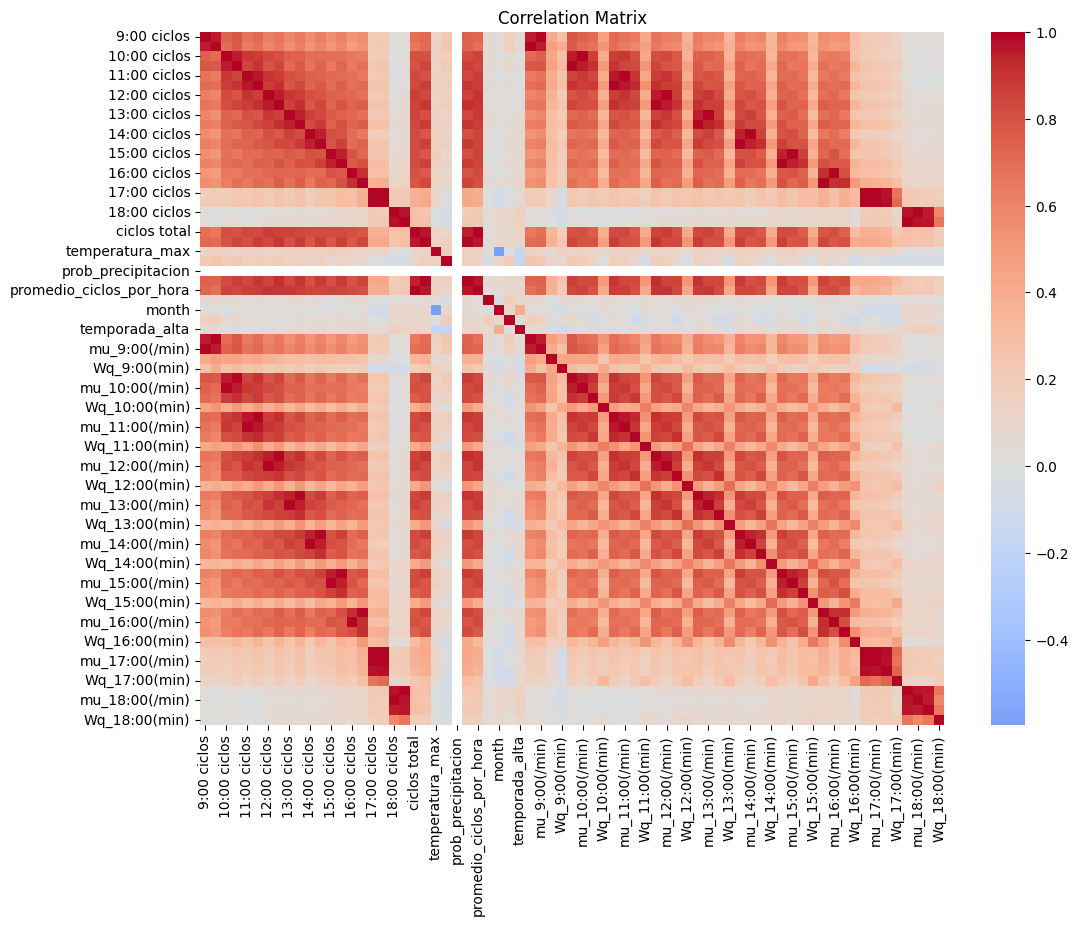

In [1002]:
num = df.select_dtypes(include=[np.number])
plt.figure(figsize=(12,9))
sns.heatmap(num.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.show()

### Limpieza de datos

In [1003]:

# Columnas a mantener
horas = [f"{h}:00" for h in range(9, 19)]

base_keep = [c for c in [
    "date", "day_of_week", "es_festivo", "nombre_festivo",
    "temperatura_max", "condiciones_cielo", "temporada_alta",
] if c in df.columns]

wq_cols     = [c for c in df.columns if c.startswith("Wq_") and "(min)" in c]
state_cols  = [c for c in df.columns if c.startswith("state_")]
asis_h_cols = [f"{h} asistencia" for h in horas if f"{h} asistencia" in df.columns]
cic_h_cols  = [f"{h} ciclos"     for h in horas if f"{h} ciclos"     in df.columns]
hourly_keep = [c for c in df.columns if c.endswith("asistencia") or c.endswith("ciclos")]

# Columnas finales a mantener (sin duplicados)
keep_cols = list(dict.fromkeys(base_keep + wq_cols + state_cols + hourly_keep))

In [1004]:

# Columnas a eliminar
drop_patterns = ("lambda_", "mu_", "rho_", "promedio_")

drop_by_pattern = [c for c in df.columns if c.startswith(drop_patterns)]
drop_the_rest = [c for c in df.columns if c not in keep_cols and c not in drop_by_pattern]

cols_to_drop = drop_by_pattern + drop_the_rest

# Eliminar columnas
df_final = df.drop(columns=cols_to_drop)

In [1005]:
print(f"Originales: {len(df.columns)}")
print(f"Mantener: {len(df_final.columns)} -> {sorted(df_final.columns)[:29]} ...")
print(f"Eliminar:  {len(cols_to_drop)}")

Originales: 87
Mantener: 47 -> ['10:00 asistencia', '10:00 ciclos', '11:00 asistencia', '11:00 ciclos', '12:00 asistencia', '12:00 ciclos', '13:00 asistencia', '13:00 ciclos', '14:00 asistencia', '14:00 ciclos', '15:00 asistencia', '15:00 ciclos', '16:00 asistencia', '16:00 ciclos', '17:00 asistencia', '17:00 ciclos', '18:00 asistencia', '18:00 ciclos', '9:00 asistencia', '9:00 ciclos', 'Wq_10:00(min)', 'Wq_11:00(min)', 'Wq_12:00(min)', 'Wq_13:00(min)', 'Wq_14:00(min)', 'Wq_15:00(min)', 'Wq_16:00(min)', 'Wq_17:00(min)', 'Wq_18:00(min)'] ...
Eliminar:  40


In [1006]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612 entries, 0 to 611
Data columns (total 47 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               612 non-null    object 
 1   9:00 ciclos        612 non-null    int64  
 2   9:00 asistencia    612 non-null    int64  
 3   10:00 ciclos       612 non-null    int64  
 4   10:00 asistencia   612 non-null    int64  
 5   11:00 ciclos       612 non-null    int64  
 6   11:00 asistencia   612 non-null    int64  
 7   12:00 ciclos       612 non-null    int64  
 8   12:00 asistencia   612 non-null    int64  
 9   13:00 ciclos       612 non-null    int64  
 10  13:00 asistencia   612 non-null    int64  
 11  14:00 ciclos       612 non-null    int64  
 12  14:00 asistencia   612 non-null    int64  
 13  15:00 ciclos       612 non-null    float64
 14  15:00 asistencia   612 non-null    float64
 15  16:00 ciclos       612 non-null    float64
 16  16:00 asistencia   612 non

In [1007]:
# ============================================
# Reformateo a formato largo 
# ============================================

# --- Configuración ---
USAR_ASISTENCIA_POR_HORA = True   
HORAS = [f"{h}:00" for h in range(9, 19)]  # 9:00..18:00

# Poner fecha en formato datetime y extraer año/mes/día
df_final = df_final.copy()
df_final["date"] = pd.to_datetime(df_final["date"], errors="coerce")
df_final["year"]  = df_final["date"].dt.year
df_final["month"] = df_final["date"].dt.month
df_final["day"]   = df_final["date"].dt.day

base_cols = [c for c in [
     "date", "day_of_week", "es_festivo", "nombre_festivo",
    "temperatura_max", "condiciones_cielo", "temporada_alta",
    "year","month","day"
] if c in df_final.columns]

# --- Construcción del DF largo ---
registros = []

def col_exists(df, col): 
    return col in df.columns

def col_h(df, h, sufijo): 
    cand = f"{h} {sufijo}"
    return cand if col_exists(df, cand) else None

for h in HORAS:
    wq_col = f"Wq_{h}(min)"
    if not col_exists(df_final, wq_col):
        continue  # si no existe Wq de esta hora, se salta

    # Subset con columnas base
    sub = df_final[base_cols].copy()
    sub["hora"] = h

    # Variables por hora (opcional)
    if USAR_ASISTENCIA_POR_HORA:
        asis_h = col_h(df_final, h, "asistencia")
        cic_h  = col_h(df_final, h, "ciclos")
        if asis_h: sub["asistencia_h"] = df_final[asis_h]
        if cic_h:  sub["ciclos_h"]     = df_final[cic_h]

    # Estado por hora (para filtrar cierres luego)
    state_h = f"state_{h}"
    sub["state"] = df_final[state_h] if col_exists(df_final, state_h) else np.nan

    # Objetivo
    sub["Wq"] = df_final[wq_col]

    registros.append(sub)

# Concatenar todo
df_final = pd.concat(registros, ignore_index=True)

# Tipos/categóricas útiles
for c in ["day_of_week","condiciones_cielo","nombre_festivo","hora","state"]:
    if c in df_final.columns:
        df_final[c] = df_final[c].astype("category")

print("Shape df_final:", df_final.shape)
print("Columnas:", list(df_final.columns))
df_final.head()

Shape df_final: (6120, 15)
Columnas: ['date', 'day_of_week', 'es_festivo', 'nombre_festivo', 'temperatura_max', 'condiciones_cielo', 'temporada_alta', 'year', 'month', 'day', 'hora', 'asistencia_h', 'ciclos_h', 'state', 'Wq']


,date,day_of_week,es_festivo,nombre_festivo,temperatura_max,condiciones_cielo,temporada_alta,year,month,day,hora,asistencia_h,ciclos_h,state,Wq
0,2022-01-01,Saturday,True,Año Nuevo,26.0,Patchy rain possible,0,2022,1,1,9:00,0.0,0.0,Closed,0.000000
1,2022-04-01,Friday,False,Ninguno,28.0,Overcast,1,2022,4,1,9:00,0.0,0.0,Closed,0.000000
2,2022-05-01,Sunday,True,Día del Trabajo,28.0,Patchy rain possible,0,2022,5,1,9:00,121.0,7.0,stable,11.523810
3,2022-07-01,Friday,False,Ninguno,25.0,Patchy rain possible,0,2022,7,1,9:00,107.0,8.0,stable,1.204955
4,2022-09-01,Thursday,False,Ninguno,22.0,Moderate or heavy rain shower,0,2022,9,1,9:00,22.0,3.0,stable,0.763889


In [1008]:
FILTRAR_CERRADOS = True   
ELIMINAR_WQ_CERO = True

# Filtrar horas cerradas (state = Closed)
if FILTRAR_CERRADOS and "state" in df_final.columns:
    mask_closed = df_final["state"].astype(str).str.lower().str.contains("closed", na=False)
    print("Filas con estado cerrado:", int(mask_closed.sum()))
    df_final = df_final[~mask_closed].copy()

# Eliminar Wq <= 0 
if ELIMINAR_WQ_CERO:
    zeros = int((df_final["Wq"] <= 0).sum())
    print("Filas con Wq <= 0:", zeros)
    df_final = df_final[df_final["Wq"] > 0].copy()

if "state" in df_final.columns:
    df_final = df_final.drop(columns=["state"])

print("Shape después de limpieza:", df_final.shape)
df_final = df_final.sort_values(["date", "hora"])
df_final.head(40)


Filas con estado cerrado: 1756
Filas con Wq <= 0: 1
Shape después de limpieza: (4363, 14)


,date,day_of_week,es_festivo,nombre_festivo,temperatura_max,condiciones_cielo,temporada_alta,year,month,day,hora,asistencia_h,ciclos_h,Wq
612,2022-01-01,Saturday,True,Año Nuevo,26.0,Patchy rain possible,0,2022,1,1,10:00,172.0,10.0,7.166667
1224,2022-01-01,Saturday,True,Año Nuevo,26.0,Patchy rain possible,0,2022,1,1,11:00,176.0,10.0,14.666667
1836,2022-01-01,Saturday,True,Año Nuevo,26.0,Patchy rain possible,0,2022,1,1,12:00,160.0,9.0,29.629630
2448,2022-01-01,Saturday,True,Año Nuevo,26.0,Patchy rain possible,0,2022,1,1,13:00,160.0,9.0,29.629630
3060,2022-01-01,Saturday,True,Año Nuevo,26.0,Patchy rain possible,0,2022,1,1,14:00,159.0,9.0,19.629630
3672,2022-01-01,Saturday,True,Año Nuevo,26.0,Patchy rain possible,0,2022,1,1,15:00,160.0,9.0,29.629630
4284,2022-01-01,Saturday,True,Año Nuevo,26.0,Patchy rain possible,0,2022,1,1,16:00,160.0,9.0,29.629630
4896,2022-01-01,Saturday,True,Año Nuevo,26.0,Patchy rain possible,0,2022,1,1,17:00,159.0,9.0,19.629630
619,2022-01-02,Sunday,False,Ninguno,27.0,Patchy rain possible,0,2022,1,2,10:00,176.0,10.0,14.666667
1231,2022-01-02,Sunday,False,Ninguno,27.0,Patchy rain possible,0,2022,1,2,11:00,179.0,10.0,59.666667


In [1009]:
# Categóricas (OneHot después)
cat_cols = [c for c in ["day_of_week","hora","es_festivo", "condiciones_cielo", "nombre_festivo"]
            if c in df_final.columns]

# Numéricas
num_cols = [c for c in ["month","day","temperatura_max", "temporada_alta", "asistencia_h", "ciclos_h"]
            if c in df_final.columns]

X = df_final[cat_cols + num_cols].copy()
X_cat = pd.get_dummies(X[cat_cols], drop_first=False)
X_num = X[num_cols].copy()

# Ensamble X/y
X = pd.concat([X_cat, X_num], axis=1)
y = df_final["Wq"].copy()

X = X.reindex(y.index)

print("Features categóricas:", cat_cols)
print("Features numéricas:", num_cols)
print("X shape:", X.shape, "| y shape:", y.shape)


Features categóricas: ['day_of_week', 'hora', 'es_festivo', 'condiciones_cielo', 'nombre_festivo']
Features numéricas: ['month', 'day', 'temperatura_max', 'temporada_alta', 'asistencia_h', 'ciclos_h']
X shape: (4363, 43) | y shape: (4363,)


In [1010]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4363 entries, 612 to 607
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   es_festivo                                        4363 non-null   bool   
 1   day_of_week_Friday                                4363 non-null   bool   
 2   day_of_week_Monday                                4363 non-null   bool   
 3   day_of_week_Saturday                              4363 non-null   bool   
 4   day_of_week_Sunday                                4363 non-null   bool   
 5   day_of_week_Thursday                              4363 non-null   bool   
 6   day_of_week_Tuesday                               4363 non-null   bool   
 7   day_of_week_Wednesday                             4363 non-null   bool   
 8   hora_10:00                                        4363 non-null   bool   
 9   hora_11:00             

In [1011]:
bool_cols = X.select_dtypes(include=["bool"]).columns
X[bool_cols] = X[bool_cols].astype(int)

In [1012]:
X.head()

,es_festivo,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,hora_10:00,hora_11:00,...,nombre_festivo_Día del Trabajo,nombre_festivo_Navidad,nombre_festivo_Ninguno,nombre_festivo_Revolución de 1944,month,day,temperatura_max,temporada_alta,asistencia_h,ciclos_h
612,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,1,1,26.0,0,172.0,10.0
1224,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,26.0,0,176.0,10.0
1836,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,26.0,0,160.0,9.0
2448,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,26.0,0,160.0,9.0
3060,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,26.0,0,159.0,9.0


In [1013]:
# Ver porcentaje de outliers usando método IQR
Q1 = y.quantile(0.25)
Q3 = y.quantile(0.75)
IQR = Q3 - Q1
umbral_inferior = Q1 - 1.5 * IQR
umbral_superior = Q3 + 1.5 * IQR

# Identificar outliers
outliers_mask = (y < umbral_inferior) | (y > umbral_superior)
num_outliers = outliers_mask.sum()
porcentaje_outliers = (num_outliers / len(y)) * 100

print(f"Total de datos: {len(y)}")
print(f"Q1: {Q1:.4f}, Q3: {Q3:.4f}, IQR: {IQR:.4f}")
print(f"Rango normal: [{umbral_inferior:.4f}, {umbral_superior:.4f}]")
print(f"Outliers encontrados: {num_outliers} ({porcentaje_outliers:.2f}%)")

# Eliminar outliers
if porcentaje_outliers < 10:  # Solo eliminar si es menos del 20%
    X_clean = X[~outliers_mask]
    y_clean = y[~outliers_mask]
else:
    X_clean = X.copy()
    y_clean = y.copy()
    print("No se eliminaron outliers debido a su alto porcentaje.")

# print(f"Datos después de eliminar outliers: {len(y_clean)} ({((len(y_clean)/len(y))*100):.1f}% restante)")

# # Actualizar train/test split con datos limpios
# X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)

Total de datos: 4363
Q1: 2.6296, Q3: 59.6667, IQR: 57.0370
Rango normal: [-82.9259, 145.2222]
Outliers encontrados: 0 (0.00%)


In [1014]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X_clean, y_clean, test_size=0.2, random_state=42
)

In [1015]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, KFold
from sklearn.dummy import DummyRegressor



In [1016]:
dummy = DummyRegressor(strategy="median")
dummy.fit(X_train, y_train)
y_pred_dummy = dummy.predict(X_test)

def report_metrics(y_true, y_pred, name="modelo"):
    mae  = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    r2   = r2_score(y_true, y_pred)
    print(f"[{name}] MAE={mae:,.2f} | RMSE={rmse:,.2f} | R²={r2:,.3f}")
    return {"MAE": mae, "RMSE": rmse, "R2": r2}

_ = report_metrics(y_test, y_pred_dummy, "Baseline (Dummy)")

[Baseline (Dummy)] MAE=26.70 | RMSE=38.15 | R²=-0.211


In [1017]:
RANDOM_STATE = 42

rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features="sqrt",
    n_jobs=-1,
    random_state=RANDOM_STATE,
    oob_score=False,
    bootstrap=True
)
rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test  = rf.predict(X_test)

print("\nMétricas entrenamiento:")
_ = report_metrics(y_train, y_pred_train, "RF (train)")
print("\nMétricas test:")
base_metrics = report_metrics(y_test, y_pred_test, "RF (test)")


Métricas entrenamiento:
[RF (train)] MAE=4.21 | RMSE=5.96 | R²=0.971

Métricas test:
[RF (test)] MAE=10.87 | RMSE=15.64 | R²=0.796


In [1018]:
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)
cv_mae  = -cross_val_score(rf, X, y, cv=cv, scoring="neg_mean_absolute_error", n_jobs=-1)
cv_rmse = (-cross_val_score(rf, X, y, cv=cv, scoring="neg_root_mean_squared_error", n_jobs=-1))
cv_r2   =  cross_val_score(rf, X, y, cv=cv, scoring="r2", n_jobs=-1)

print(f"CV MAE  -> mean={cv_mae.mean():.2f}  std={cv_mae.std():.2f}")
print(f"CV RMSE -> mean={cv_rmse.mean():.2f} std={cv_rmse.std():.2f}")
print(f"CV R²   -> mean={cv_r2.mean():.3f}  std={cv_r2.std():.3f}")

CV MAE  -> mean=11.31  std=0.51
CV RMSE -> mean=16.03 std=0.87
CV R²   -> mean=0.791  std=0.020


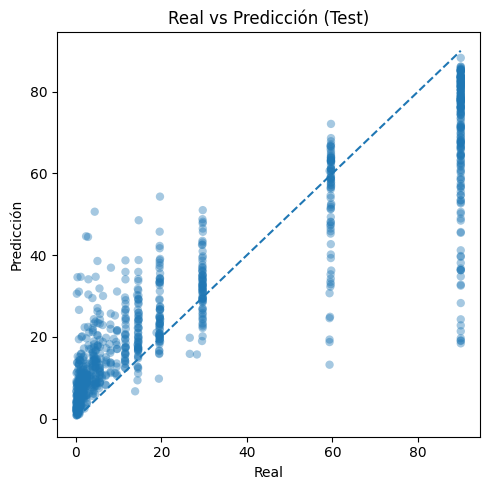

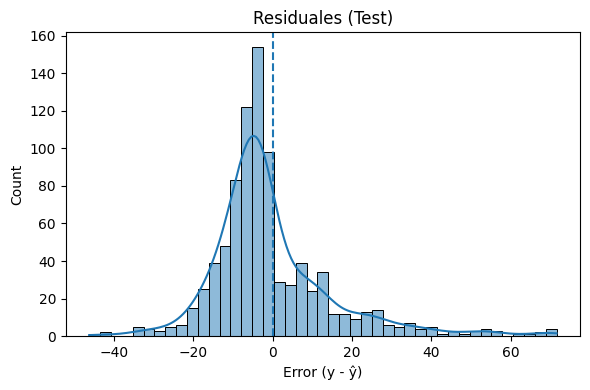

In [1019]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred_test, alpha=0.4, edgecolor="none")
lims = [min(y_test.min(), y_pred_test.min()), max(y_test.max(), y_pred_test.max())]
plt.plot(lims, lims, linestyle="--")
plt.xlabel("Real")
plt.ylabel("Predicción")
plt.title("Real vs Predicción (Test)")
plt.tight_layout()
plt.show()

resid = y_test - y_pred_test
plt.figure(figsize=(6,4))
if sns is not None:
    sns.histplot(resid, kde=True)
else:
    plt.hist(resid, bins=30)
plt.axvline(0, linestyle="--")
plt.title("Residuales (Test)")
plt.xlabel("Error (y - ŷ)")
plt.tight_layout()
plt.show()

Top 15 importancias (modelo):


asistencia_h                                       0.417308
ciclos_h                                           0.145091
day                                                0.074555
month                                              0.066768
temperatura_max                                    0.061937
hora_9:00                                          0.018738
day_of_week_Sunday                                 0.016159
temporada_alta                                     0.013179
condiciones_cielo_Patchy rain possible             0.011789
condiciones_cielo_Moderate or heavy rain shower    0.010512
day_of_week_Saturday                               0.010222
day_of_week_Friday                                 0.009527
hora_15:00                                         0.009492
hora_10:00                                         0.009433
day_of_week_Thursday                               0.009391
dtype: float64

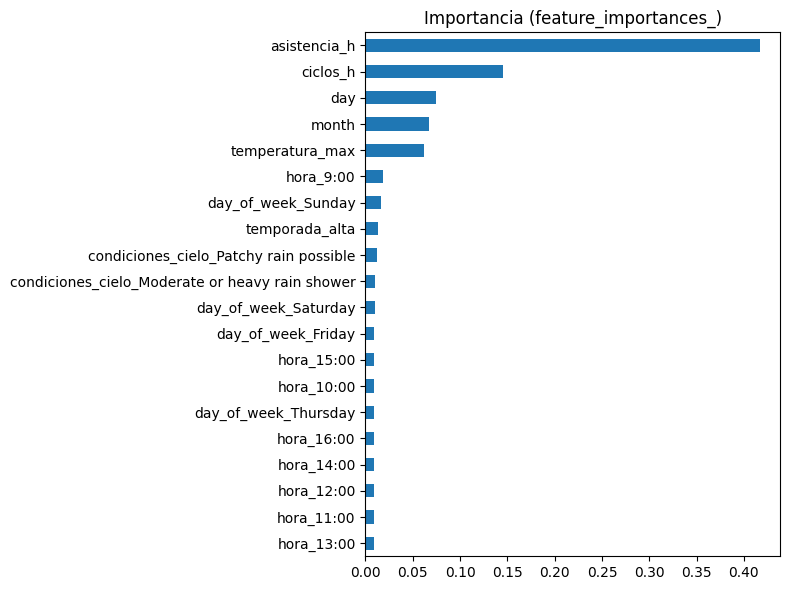

In [1020]:
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 15 importancias (modelo):")
display(imp.head(15))

plt.figure(figsize=(8,6))
imp.head(20).iloc[::-1].plot(kind="barh")
plt.title("Importancia (feature_importances_)")
plt.tight_layout()
plt.show()
